In [12]:
import numpy as np
import numpy.ma as ma
import math
import matplotlib.pyplot as plt
import pdb
from tiltedrings_losv import disk_model

## Eigenbrot -- SALT data, email Matt?
## Maybe just do a lag without a warp first!

from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage.interpolation import zoom

plt.rcParams['figure.figsize'] = (8,8)
plt.rc('axes', labelsize = 25)
plt.rc('axes', titlesize = 18)
#plt.rc('axes', titleweight = 'bold')
plt.rc('axes', lw = 2)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/1585685137.py:13: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


In [13]:
# import modules
import numpy as np
from astropy.io import fits
import pandas as pd
from RotationCurveTiltedRings import FitTiltedRings
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

from astropy.table import Table
from astropy import units as u
import time


from astropy.io import fits
from astropy.table import Table, Column, MaskedColumn,unique,vstack
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib import colors
from matplotlib.colors import LogNorm
from linetools.spectra.xspectrum1d import XSpectrum1D


plt.rcParams['figure.figsize'] = (8,8)
plt.rc('axes', labelsize = 25)
plt.rc('axes', titlesize = 18)
#plt.rc('axes', titleweight = 'bold')
plt.rc('axes', lw = 2)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

In [146]:
# MUSE cube directory for 2.0 binning
main_dir = '/Users/erickaguirre/mangadap/examples/'
main_dir2 = '/Users/erickaguirre/Desktop/SDSU_Research/Getting_used_to_MaNGA_DAP/'
main_dir3 = '/Users/erickaguirre/Desktop/DAP_outputs/'

# NGC 4030
NGC4030_output_dir = 'output0.6_NGC4030_NOISM_err_corr/'
NGC4030_cube_dir = 'SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/'
# log cube
NGC4030_cube0_6_file = main_dir3+ NGC4030_output_dir+ NGC4030_cube_dir+\
                       'manga-1-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits'
NGC4030_cube0_6 = fits.open(NGC4030_cube0_6_file)

# log maps
NGC4030_map_file = main_dir3+ NGC4030_output_dir+ NGC4030_cube_dir+\
                   'manga-1-1-MAPS-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits'
NGC4030_map = fits.open(NGC4030_map_file)

# For continuum-normalization around NaI
# wavelength continuum fitting range outside of NaI region
blim = [5850.0,5870.0]
rlim = [5910.0,5930.0]
# wavelength fitting range inside of NaI region
fitlim = [5880.0,5910.0]
# speed of light in km/s
c = 2.998e5
# Na I doublet vacuum absorption wavelengths 
D2 = 5891.582 # in angstroms
D1 = 5897.558 # in angstroms

# redshift 
z = 0.00489
# obtain flux array from MUSE cube
flux = NGC4030_cube0_6['FLUX'].data
model = NGC4030_cube0_6['MODEL'].data
ivar = NGC4030_cube0_6['IVAR'].data
error = np.sqrt(1/ivar)
wave = NGC4030_cube0_6['WAVE'].data

# obtain stellar velocity, stellar velocity error, stellar dispersion and bin id data from the galaxy
stellar_vel =  NGC4030_map['STELLAR_VEL'].data
stellar_ivar =  NGC4030_map['STELLAR_VEL_IVAR'].data
stellar_error = np.sqrt(1/stellar_ivar)
stellar_sigma = NGC4030_map['STELLAR_SIGMA'].data
binid_map = NGC4030_map['BINID'].data[0]

# Need LSF in km/s
# This gives LSF in Ang
# CAUTION: this does not convert air wavelengths
# to vacuum, or account for velocity offset of each bin
redshift = 0.00489 
LSFdir = '/Users/erickaguirre/Desktop/SDSU_Research/Getting_used_to_MaNGA_DAP/'
LSFfil = LSFdir + 'LSF-Config_MUSE_WFM'
configLSF = np.genfromtxt(LSFfil, comments='#')
configLSF_wv_air = configLSF[:,0]
configLSF_res = configLSF[:,1]

# convert to vacuum since LSF is in air
xspec = XSpectrum1D.from_tuple((configLSF_wv_air, 0.0*configLSF_wv_air))
xspec.meta['airvac'] = 'air'
xspec.airtovac()
configLSF_wv_vac = xspec.wavelength.value

configLSF_restwv = configLSF_wv_vac / (1.0+redshift)
whLSF = np.where((configLSF_restwv > fitlim[0]) & (configLSF_restwv < fitlim[1]))

median_LSFAng = np.median(configLSF_res[whLSF[0]])
median_LSFvel = c * median_LSFAng / np.median(configLSF_wv_vac[whLSF[0]])
LSFvel = median_LSFvel

/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/3145992650.py:37: RuntimeWarning: divide by zero encountered in true_divide
  error = np.sqrt(1/ivar)
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/3145992650.py:37: RuntimeWarning: overflow encountered in true_divide
  error = np.sqrt(1/ivar)
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/3145992650.py:43: RuntimeWarning: divide by zero encountered in true_divide
  stellar_error = np.sqrt(1/stellar_ivar)
/Users/erickaguirre/packages/linetools/linetools/spectra/xspectrum1d.py:107: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


In [47]:
# emission line header dictionary
emline = {}
for k, v in NGC4030_map['EMLINE_GFLUX'].header.items():
    if k[0] == 'C':
        try:
            i = int(k[1:])-1
        except ValueError:
            continue
        emline[v] = i
        
# H-alpha emission line flux from MUSE cube (1E-17 erg/s/cm^2/spaxel)
# 23rd index = 24 channel
halpha_map = NGC4030_map['EMLINE_GFLUX'].data[emline['Ha-6564'],:,:]
halpha_err_map = np.sqrt(1/NGC4030_map['EMLINE_GFLUX_IVAR'].data[emline['Ha-6564'],:,:])
# H-beta emission line flux from MUSE cube
hbeta_map = NGC4030_map['EMLINE_GFLUX'].data[emline['Hb-4862'],:,:]
hbeta_err_map = np.sqrt(1/NGC4030_map['EMLINE_GFLUX_IVAR'].data[emline['Hb-4862'],:,:])

# Emission line EW and error
# H-alpha 
halpha_EW_map = NGC4030_map['EMLINE_GEW'].data[emline['Ha-6564'],:,:]
halpha_EW_err_map = np.sqrt(1/NGC4030_map['EMLINE_GEW_IVAR'].data[emline['Ha-6564'],:,:])
# H-beta 
hbeta_EW_map = NGC4030_map['EMLINE_GEW'].data[emline['Hb-4862'],:,:]
hbeta_EW_err_map = np.sqrt(1/NGC4030_map['EMLINE_GEW_IVAR'].data[emline['Hb-4862'],:,:])

# H-alpha velocity map from MUSE cube (km/s)
halpha_vel_map = NGC4030_map['EMLINE_GVEL'].data[emline['Ha-6564'],:,:]

# dc = cube.DataCube(inp=NGC4030_cube0_6_file)
# n_band = transform.narrowband(dc, 5880, 5910, mode='median')
# img_data = n_band.data

# load the data
file = fits.open('NGC4030_0.6_err_corr_mcmc_output.fits')
table_all = Table(file[1].data)
gas_vel_map = file[2].data

# filter out bad values
table_good = table_all[table_all['velocities'] > -999]
# exclude velocities with high confidence interval widths
vel_widths = np.absolute(table_good['vel_uncert_84th_percent']-table_good['vel_uncert_16th_percent'])

vel_width_map = np.zeros(gas_vel_map.shape)
for binid in table_good['bin']:
    index = np.where(binid_map == binid)
    binid_indx = np.where(table_good['bin']== binid)
    vel_width_map[index] = vel_widths[binid_indx][0]
        
vel_widths_filt = vel_widths[vel_widths<100]
table_uniq = table_good[vel_widths<100]

# Na I velocity masked map
gas_vel_mask = ma.masked_where((vel_width_map>100) | (binid_map==-1), gas_vel_map)

R_coord_map = NGC4030_map['SPX_ELLCOO'].data
R_eff_map = R_coord_map[1,:,:]
R_eff_map_mask = ma.masked_where((R_eff_map>1), R_eff_map)

# plt.imshow(R_arcsec_map,origin='lower',extent=[32.4, -32.6,-32.4, 32.6])
# plt.ylabel(r'$\Delta \delta$ (arcsec)',fontsize=28)
# plt.xlabel(r'$\Delta \alpha$ (arcsec)',fontsize=28)
# clb = plt.colorbar(fraction=0.046, pad=0.04);
# clb.set_label('R (arcsec)',fontsize=28,rotation = 90);

/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/358421717.py:14: RuntimeWarning: divide by zero encountered in true_divide
  halpha_err_map = np.sqrt(1/NGC4030_map['EMLINE_GFLUX_IVAR'].data[emline['Ha-6564'],:,:])
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/358421717.py:17: RuntimeWarning: divide by zero encountered in true_divide
  hbeta_err_map = np.sqrt(1/NGC4030_map['EMLINE_GFLUX_IVAR'].data[emline['Hb-4862'],:,:])
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/358421717.py:22: RuntimeWarning: divide by zero encountered in true_divide
  halpha_EW_err_map = np.sqrt(1/NGC4030_map['EMLINE_GEW_IVAR'].data[emline['Ha-6564'],:,:])
/var/folders/w8/2sm2ctrx0q1_ggrf2bd4lyd40000gn/T/ipykernel_7640/358421717.py:25: RuntimeWarning: divide by zero encountered in true_divide
  hbeta_EW_err_map = np.sqrt(1/NGC4030_map['EMLINE_GEW_IVAR'].data[emline['Hb-4862'],:,:])


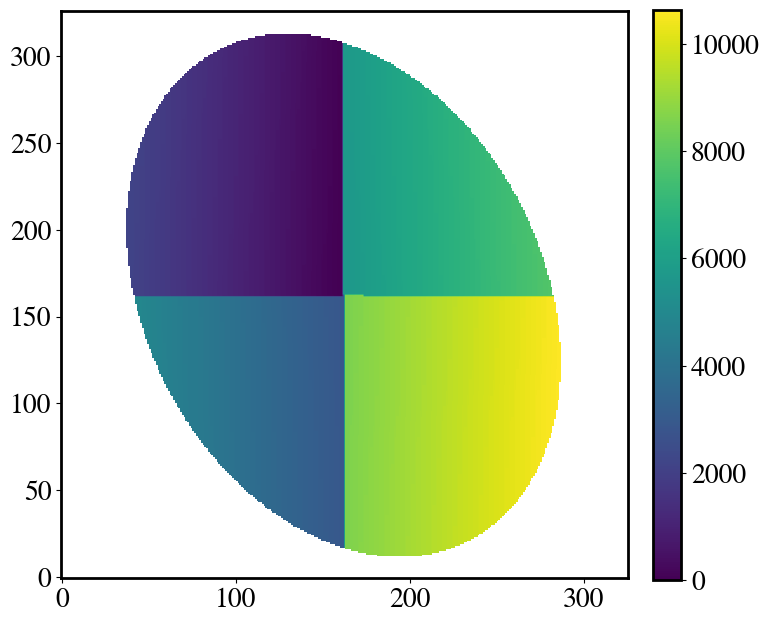

In [112]:

plt.imshow(ma.masked_where((R_eff_map>1), binid_map),origin='lower',cmap='viridis')
clb = plt.colorbar(fraction=0.046, pad=0.04);

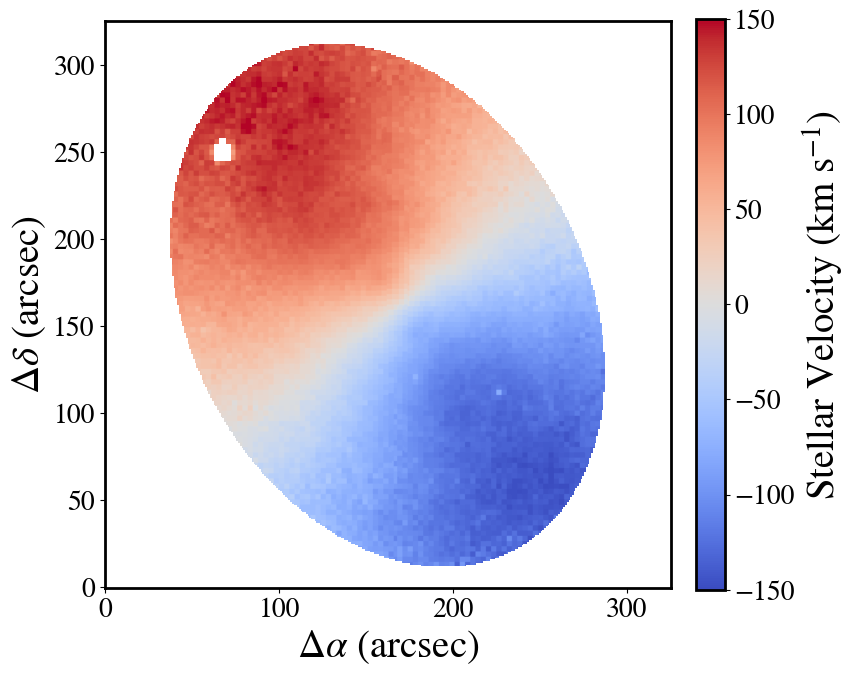

In [49]:
stellar_vel_mask = ma.masked_where((R_eff_map>1)|(stellar_vel<-500), stellar_vel)

plt.imshow(stellar_vel_mask,origin='lower',cmap='coolwarm',vmin=-150,vmax=150)
#           extent=[32.4, -32.6,-32.4, 32.6])
#plt.imshow(stellar_vel_mask,origin='lower',cmap='rainbow',vmin=-150,vmax=150)
          #extent=[32.4, -32.6,-32.4, 32.6])


# x = np.arange(0, 326, 1)
# y = np.arange(0, 326, 1) # point location
# plt.contourf(x,y,stellar_vel_mask,cmap='rainbow',vmin=-150,vmax=150,)
#plt.colorbar()

# plt.xlim(35,-35)
# plt.ylim(-35,35)

plt.ylabel(r'$\Delta \delta$ (arcsec)',fontsize=28)
plt.xlabel(r'$\Delta \alpha$ (arcsec)',fontsize=28)
clb = plt.colorbar(fraction=0.046, pad=0.04);
clb.set_label('Stellar Velocity (km s$^{-1}$)',fontsize=28,rotation = 90)
# plt.savefig('/Users/erickaguirre/Desktop/paper_plots/0.6_err_corr_plots/NaI_velocities.pdf',
#             bbox_inches='tight');

/Users/erickaguirre/Desktop/NaImcmcIFU/muse/tiltedrings_losv.py:274: RuntimeWarning: invalid value encountered in true_divide
  cos_theta = ((-1.0*(data[0] - xC)*np.sin(pa.radian[qq])) + ((data[1] - yC)*np.cos(pa.radian[qq]))) / dist_el
/Users/erickaguirre/Desktop/NaImcmcIFU/muse/tiltedrings_losv.py:275: RuntimeWarning: invalid value encountered in true_divide
  sin_theta = ((-1.0*(data[0] - xC)*np.cos(pa.radian[qq])) - ((data[1] - yC)*np.sin(pa.radian[qq]))) / (dist_el*np.cos(incl.radian[qq]))


(17000,)
(17000,)


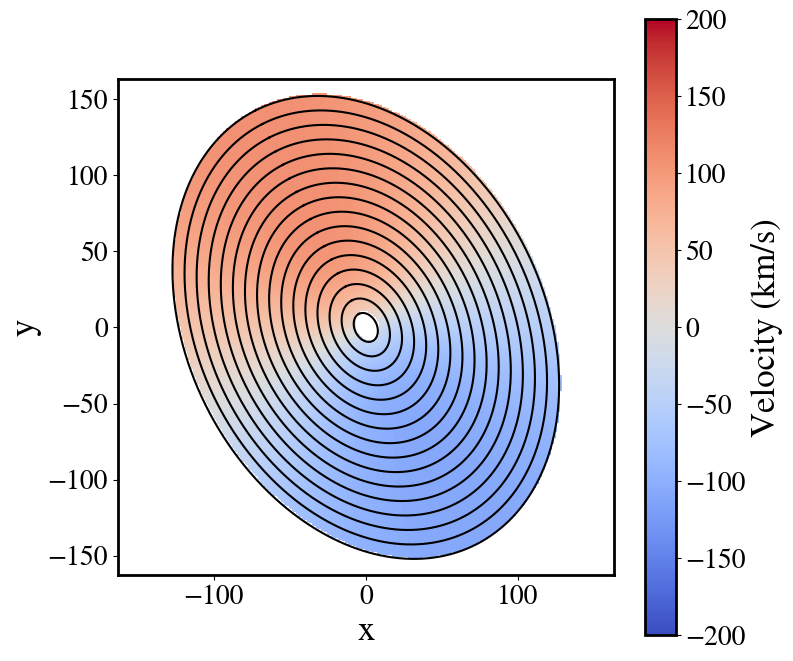

In [349]:
## NGC 4030 Model
## From Corbelli & Schneider 1997
vInf = 160 # max rotation velocity (from Matthewson & Ford 1996)
deltaV = 30 # guess using Katia 2006 (SAURON study)
# inclination angle
phi0 = 43 # from MAD survey
phiInf = 43 # guess
Rphi = 23 # guess
deltaphi = 10
# position angle PA
theta0 = 27 # from MAD survey
thetaInf = 27
Rtheta = 40.
deltatheta = 7.00

NGC4030 = disk_model(vInf, deltaV, phi0, phiInf, Rphi, deltaphi,
                     theta0, thetaInf, Rtheta, deltatheta, zAcc=None, vLag=None, vAcc=None)
NGC4030.Set_Rings(170, 10)
NGC4030.Phi_r()
NGC4030.Theta_r()
NGC4030.vRot_r()
NGC4030.Rings_vLOS([-163, 163], 1, "NGC4030_rings_losvel.pdf")
#NGC4030.Plot_Rings([-60.0, 60.0], [-60.0, 60.0], "NGC4030_tiltedrings.pdf")

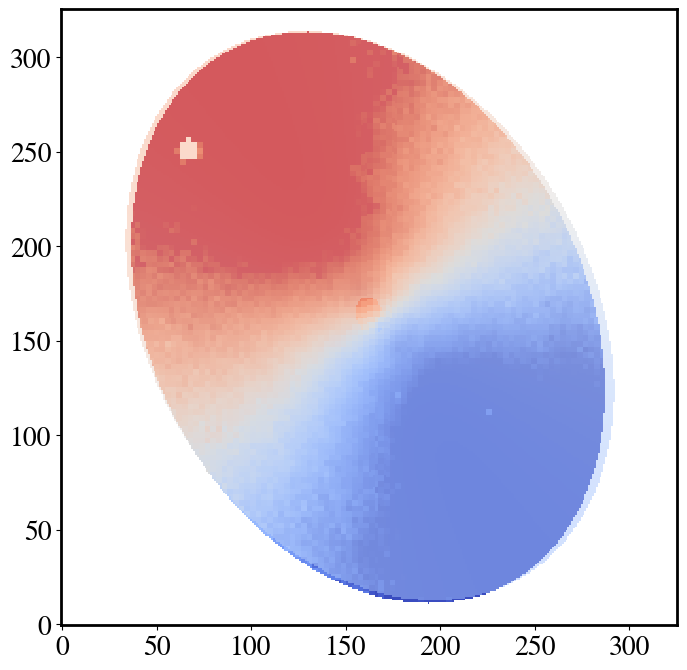

In [347]:
plt.imshow(stellar_vel_mask,interpolation='nearest', cmap='coolwarm',
           origin='lower',vmin=-100.0, vmax=100.0)

plt.imshow( NGC4030.vLOS_interp,interpolation='nearest', cmap='coolwarm', alpha=0.5,
           origin='lower',vmin=-300.0, vmax=300.0);#,extent=[32.4, -32.6,-32.4, 32.6])

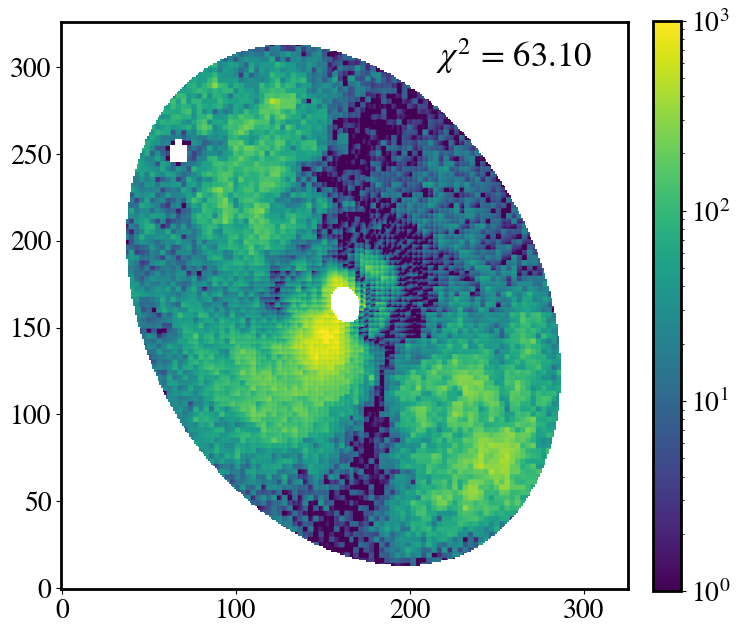

In [348]:
chi_sqrs = (NGC4030.vLOS_interp - stellar_vel_mask)**2/stellar_error**2
reduc_chi_sqr = np.sum(chi_sqrs)/( len(chi_sqrs.compressed()) - 16)

plt.imshow(chi_sqrs, cmap='viridis',norm=LogNorm(vmin=1, vmax=1e3),
           origin='lower')#,vmin=-100, vmax=100)
#chi_txt = r'$\Chi^2$ = {}'.format(reduc_chi_sqr)
plt.annotate(text = r'$\chi^2$ = {:.2f}'.format(reduc_chi_sqr),xy=(215,300),fontsize=25)
clb = plt.colorbar(fraction=0.046, pad=0.04);
#clb.set_label('Stellar Velocity (km s$^{-1}$)',fontsize=28,rotation = 90)

In [323]:
np.unique(binid_map[R_eff_map<1]).shape

(6510,)

In [ ]:
def bin_resolution(vel_map,bin_map,R_eff_map):
    
    bin_ids = np.unique(binid_map[R_eff_map<1])
    
    for binid in bin_ids:
    index = np.where(binid_map == binid)
    binid_indx = np.where(table_good['bin']== binid)
    vel_width_map[index] = vel_widths[binid_indx][0]

/Users/erickaguirre/Desktop/NaImcmcIFU/muse/tiltedrings_losv.py:274: RuntimeWarning: invalid value encountered in true_divide
  cos_theta = ((-1.0*(data[0] - xC)*np.sin(pa.radian[qq])) + ((data[1] - yC)*np.cos(pa.radian[qq]))) / dist_el
/Users/erickaguirre/Desktop/NaImcmcIFU/muse/tiltedrings_losv.py:275: RuntimeWarning: invalid value encountered in true_divide
  sin_theta = ((-1.0*(data[0] - xC)*np.cos(pa.radian[qq])) - ((data[1] - yC)*np.sin(pa.radian[qq]))) / (dist_el*np.cos(incl.radian[qq]))


(17000,)
(17000,)


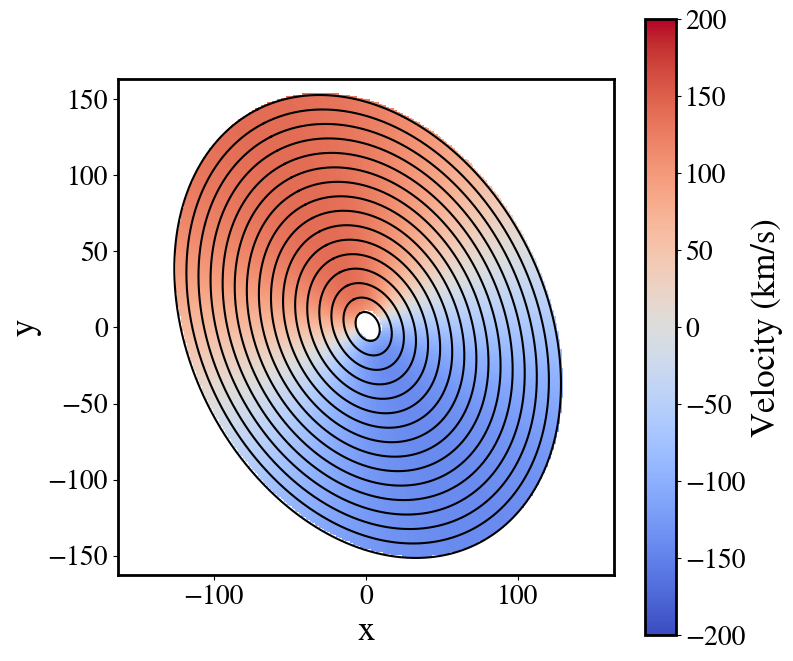

In [96]:
## Extraplaner layer with NGC4030-like tilted rings
zAcc = 2.0   # height of layer
vLag = -15.0   # halo lag in km/s/kpc
vAcc = 0.0   # accretion velocity in km/s
NGC4030_extraplanar = disk_model(vInf, deltaV, phi0, phiInf, Rphi, deltaphi,
                                 theta0, thetaInf, Rtheta, deltatheta, zAcc=zAcc, vLag=vLag, vAcc=vAcc)

NGC4030_extraplanar.Set_Rings(170, 10)
NGC4030_extraplanar.Phi_r()
NGC4030_extraplanar.Theta_r()
NGC4030_extraplanar.vRot_extraplanar()
NGC4030_extraplanar.Rings_vLOS([-163, 163], 1, "NGC4030_rings_losvel.pdf")

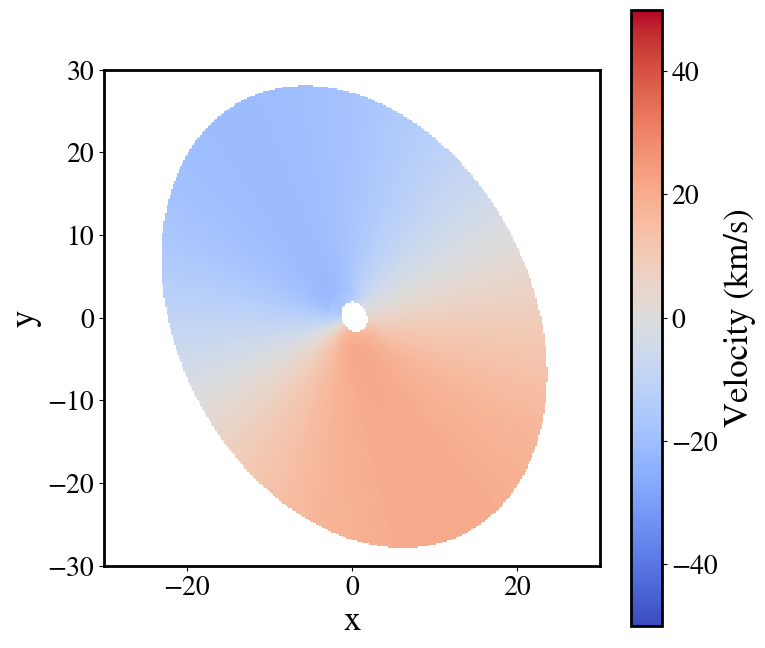

In [97]:
fig, ax = plt.subplots(1, 1)
coordrange = [-30.0, 30.0]
vLOS_interp_diff =  NGC4030_extraplanar.vLOS_interp - NGC4030.vLOS_interp
cax = ax.imshow(vLOS_interp_diff, interpolation='nearest', cmap='coolwarm', origin='lower',
                extent=[coordrange[0], coordrange[1], coordrange[0], coordrange[1]], vmin=-50.0, vmax=50.0)

# for qq in range(len(m33_extraplanar.rings_r)):
#     ax.plot(m33_extraplanar.ring_x[qq,:], m33_extraplanar.ring_y[qq,:], color='black')
    
cbar = fig.colorbar(cax)
cbar.set_label("Velocity (km/s)")

ax.set_xlabel('x')
ax.set_ylabel('y');

/Users/erickaguirre/Desktop/NaImcmcIFU/muse/tiltedrings_losv.py:274: RuntimeWarning: invalid value encountered in true_divide
  cos_theta = ((-1.0*(data[0] - xC)*np.sin(pa.radian[qq])) + ((data[1] - yC)*np.cos(pa.radian[qq]))) / dist_el
/Users/erickaguirre/Desktop/NaImcmcIFU/muse/tiltedrings_losv.py:275: RuntimeWarning: invalid value encountered in true_divide
  sin_theta = ((-1.0*(data[0] - xC)*np.cos(pa.radian[qq])) - ((data[1] - yC)*np.sin(pa.radian[qq]))) / (dist_el*np.cos(incl.radian[qq]))


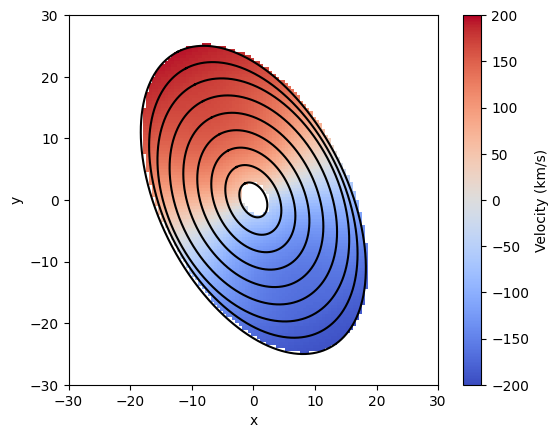

In [6]:
## For a simple rotating disk
vInf = 236 # max rotation velocity (from Matthewson & Ford 1996)
deltaV = 8.47 # guess
# inclination angle
phi0 = 47 # from MAD survey
phiInf = 56.8 # guess
Rphi = 23.4
deltaphi = 3.37
# position angle PA
theta0 = 27 # from MAD survey
thetaInf = 30
Rtheta = 40.8
deltatheta = 7.00

rotdisk = disk_model(vInf, deltaV, phi0, phiInf, Rphi, deltaphi,
                     theta0, thetaInf, Rtheta, deltatheta, zAcc=None, vLag=None, vAcc=None)

rotdisk.Set_Rings(30.0, 3.0)
rotdisk.Phi_r()
rotdisk.Theta_r()
rotdisk.vRot_r()
rotdisk.Rings_vLOS([-30.0, 30.0], 0.5, "rotdisk_rings_losvel.pdf")

In [ ]:
#pdb.set_trace()


fig, ax = plt.subplots(1, 1)

whbg = np.where(NGC4030_extraplanar.z_interp < rotdisk.z_interp)
diff_vLOS = NGC4030_extraplanar.vLOS_interp - rotdisk.vLOS_interp
diff_vLOS[whbg] = 0.0
                
cax = ax.imshow((NGC4030_extraplanar.vLOS_interp - rotdisk.vLOS_interp), interpolation='nearest', cmap='coolwarm', origin='lower',
                    extent=[-60,60,-60,60], vmin=-50.0, vmax=50.0)

cbar = fig.colorbar(cax)
cbar.set_label("Velocity (km/s)")
plt.savefig("diff_m33extra_rotdisk.pdf", format='pdf')

fig, ax = plt.subplots(1, 1)
cax = ax.imshow(NGC4030_extraplanar.z_interp, interpolation='nearest', cmap='coolwarm', origin='lower',
                    extent=[-60,60,-60,60], vmin=-60.0, vmax=60.0)

cbar = fig.colorbar(cax)
cbar.set_label("z location (arcmin)")
plt.savefig("NGC4030_z.pdf", format='pdf')

fig, ax = plt.subplots(1, 1)
cax = ax.imshow(rotdisk.z_interp, interpolation='nearest', cmap='coolwarm', origin='lower',
                    extent=[-60,60,-60,60], vmin=-60.0, vmax=60.0)

cbar = fig.colorbar(cax)
cbar.set_label("z location (arcmin)")